In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom

In [29]:
N=12
pwin=0.20
plos=0.15
ptie=0.65

In [93]:
class ChessProb:

    def __init__(self, N=12, pwin=0.20, ploss=0.15):
        self.N = N
        self.pwin  = pwin
        self.ploss = ploss
        self.ptie  = 1.0 - pwin - ploss
        self.d = pd.DataFrame({"wins": np.arange(0,N+1)})
        self._calc_probs()
    
    def pwintotal(self):
        return self.d['p'].sum()

    def _ties(self, n):
        pts = self.N // 2 - n
        if pts < 0:
            return None
        else:
            return 2 * pts + 1

    def _pwins(self, x):
        return binom.pmf(x, self.N, self.pwin)

    def _pties(self, x):
        if x == None or np.isnan(x):
            return 1.0
        elif x > self.N:
            return 0.0
        s = 0
        for k in range(int(x), self.N+1):
            s += binom.pmf(k, self.N, self.ptie)
        return s

    def _calc_probs(self):
        self.d['ties']  = self.d['wins'].apply(self._ties)
        self.d['pwins'] = self.d['wins'].apply(self._pwins)
        self.d['pties'] = self.d['ties'].apply(self._pties)
        self.d['p']     = self.d['pwins'] * self.d['pties']
    
    
p12 = ChessProb(12)
p24 = ChessProb(24)

In [94]:
p12.pwintotal()

0.4949813050849382

In [95]:
p24.pwintotal()

0.5491211916656698

In [96]:
x = np.arange(10, 510, 10)

In [97]:
x

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500])

In [98]:
y = np.array([ChessProb(n).pwintotal() for n in x])

In [99]:
y

array([0.48090611, 0.53461115, 0.56735824, 0.5919071 , 0.61195713,
       0.6291078 , 0.64420437, 0.65775214, 0.67007968, 0.68141403,
       0.69191956, 0.70171961, 0.71090952, 0.71956476, 0.7277463 ,
       0.73550423, 0.74288031, 0.7499098 , 0.75662282, 0.76304532,
       0.76919989, 0.77510632, 0.78078207, 0.78624269, 0.79150202,
       0.79657252, 0.80146542, 0.80619092, 0.81075828, 0.81517595,
       0.81945171, 0.82359268, 0.82760543, 0.83149606, 0.83527019,
       0.83893307, 0.84248958, 0.84594428, 0.84930143, 0.85256501,
       0.85573879, 0.85882627, 0.8618308 , 0.86475548, 0.86760329,
       0.87037702, 0.87307932, 0.87571269, 0.87827954, 0.88078211])

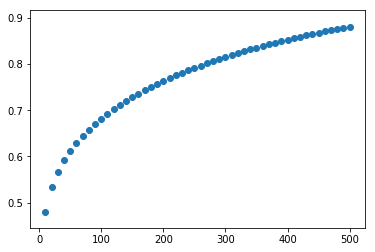

In [100]:
plt.scatter(x, y)